# Air Quality Prediction
### *Complete Predictive Analytics Project with Classification Models, Visualizations & Six Analytical Objectives*

---

##  **Introduction**

Air pollution presents significant risks to public health and environmental sustainability.  
This project uses Machine Learning techniques to predict **air quality categories**, analyze pollution patterns, and extract insights from the dataset.

We perform:

- Data preprocessing  
- Exploratory data analysis  
- Feature encoding and scaling  
- Model training and evaluation  
- Multiple classification models  
- Visualization of model performance  
- Six predictive analytics objectives  
- Final conclusions & recommendations  

---

**Objectives**:
- Predict Future Pollutant Concentrations
- Identify High-Risk Air Quality Periods
- Detect Geographical Pollution Patterns (KMeans)
- Pollutant Anomaly Detection Using Z-Score
- Estimate Missing/Unreliable Values
- Determine Key Drivers of Pollution

---

## **1. Load Required Libraries**

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Neural Network": MLPClassifier(max_iter=800),
    "Random Forest": RandomForestClassifier()
}

## 2. Load Dataset

In [179]:
df = pd.read_csv("C://Users//ASUS//Downloads//3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69 (1).csv")
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",23-11-2025 01:00:00,26.803650,84.519540,PM10,44.0,148.0,100.0
1,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",23-11-2025 01:00:00,26.803650,84.519540,NO2,7.0,10.0,8.0
2,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",23-11-2025 01:00:00,26.803650,84.519540,CO,58.0,109.0,100.0
3,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",23-11-2025 01:00:00,25.251013,86.989001,PM10,60.0,134.0,111.0
4,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",23-11-2025 01:00:00,25.251013,86.989001,NH3,1.0,1.0,1.0


## 3. Exploratory Data Analysis (EDA)

In [180]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",23-11-2025 01:00:00,26.803650,84.519540,PM10,44.0,148.0,100.0
1,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",23-11-2025 01:00:00,26.803650,84.519540,NO2,7.0,10.0,8.0
2,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",23-11-2025 01:00:00,26.803650,84.519540,CO,58.0,109.0,100.0
3,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",23-11-2025 01:00:00,25.251013,86.989001,PM10,60.0,134.0,111.0
4,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",23-11-2025 01:00:00,25.251013,86.989001,NH3,1.0,1.0,1.0


In [181]:
df.tail()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3288,India,West_Bengal,Kolkata,"Fort William, Kolkata - WBPCB",23-11-2025 01:00:00,22.556640,88.342674,PM10,133.0,248.0,179.0
3289,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",23-11-2025 01:00:00,22.499290,88.369170,PM2.5,198.0,388.0,297.0
3290,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",23-11-2025 01:00:00,22.627847,88.380669,NH3,12.0,13.0,12.0
3291,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",23-11-2025 01:00:00,22.511060,88.351420,NH3,8.0,31.0,16.0
3292,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",23-11-2025 01:00:00,26.687923,88.415250,NH3,11.0,11.0,11.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3293 non-null   object 
 1   state          3293 non-null   object 
 2   city           3293 non-null   object 
 3   station        3293 non-null   object 
 4   last_update    3293 non-null   object 
 5   latitude       3293 non-null   float64
 6   longitude      3293 non-null   float64
 7   pollutant_id   3293 non-null   object 
 8   pollutant_min  3091 non-null   float64
 9   pollutant_max  3091 non-null   float64
 10  pollutant_avg  3091 non-null   float64
dtypes: float64(5), object(6)
memory usage: 283.1+ KB


In [183]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3293.000000,3293.000000,3091.000000,3091.000000,3091.000000
mean,22.853372,78.622118,38.383695,108.996765,67.633452
std,5.411569,4.819995,54.628196,122.292889,84.262757
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.101220,75.638133,6.000000,19.000000,13.000000
50%,23.549395,77.315741,16.000000,60.000000,31.000000
75%,27.213494,80.612222,48.000000,150.500000,94.000000
max,34.066206,94.636574,338.000000,500.000000,462.000000


In [184]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    202
pollutant_max    202
pollutant_avg    202
dtype: int64

### Correlation Heatmap  

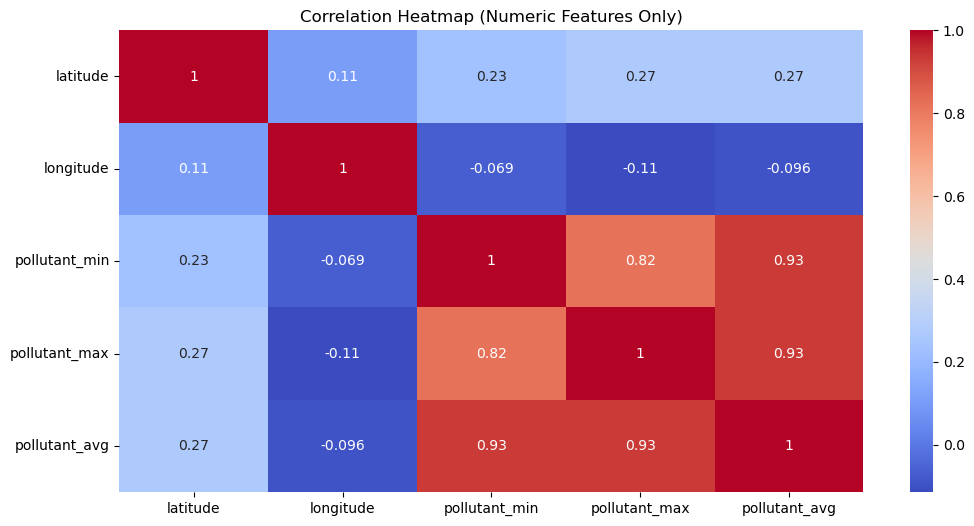

In [185]:
plt.figure(figsize=(12,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

### Distribution of Numeric Features  

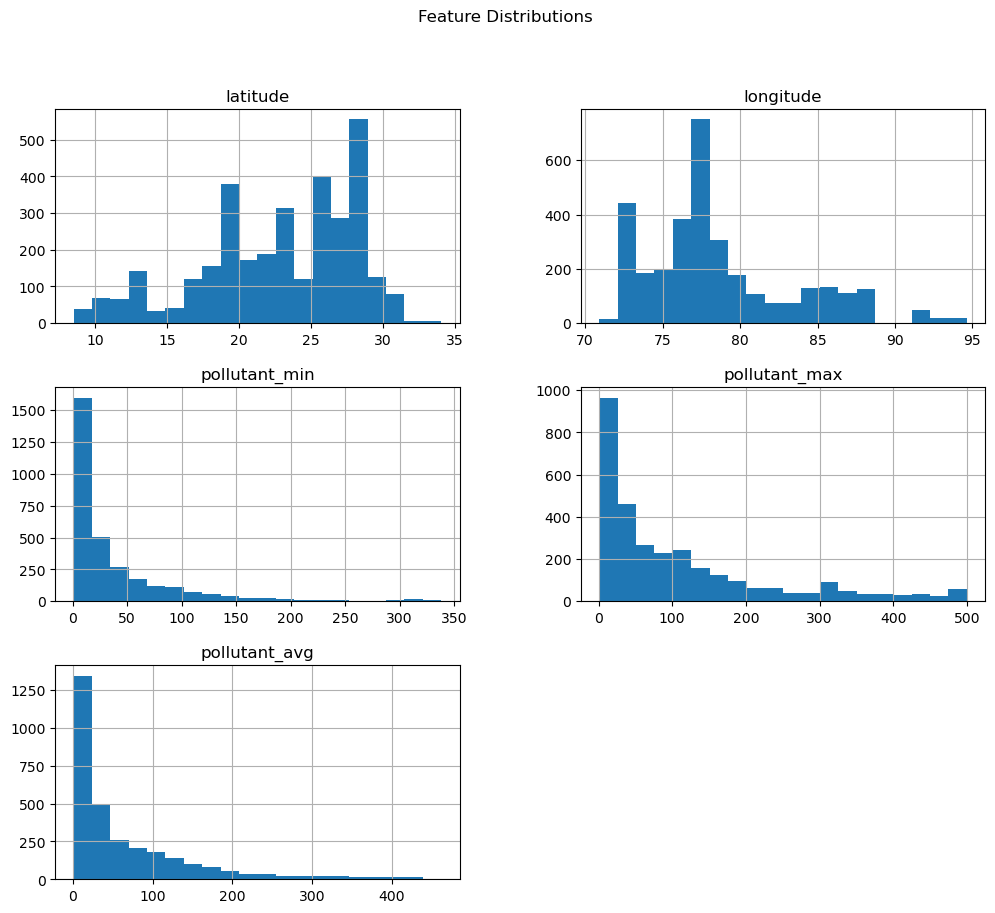

In [186]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

## 4. Data Cleaning & Preprocessing

In [187]:
df = df.dropna()
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [188]:
def get_aqi_class(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Satisfactory"
    elif value <= 200: return "Moderate"
    elif value <= 300: return "Poor"
    elif value <= 400: return "Very Poor"
    else: return "Severe"

df["AQI_Class"] = df["pollutant_avg"].apply(get_aqi_class)

In [189]:
df["last_update"] = pd.to_datetime(df["last_update"], errors='coerce')

df["year"] = df["last_update"].dt.year
df["month"] = df["last_update"].dt.month
df["day"] = df["last_update"].dt.day
df["hour"] = df["last_update"].dt.hour

In [190]:
label_encoders = {}
for col in ["country", "state", "city", "station", "pollutant_id"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [191]:
X = df[[
    "country", "state", "city", "station",
    "latitude", "longitude",
    "pollutant_id",
    "year", "month", "day", "hour"
]]

In [192]:
y = df["AQI_Class"]
y_encoded = LabelEncoder().fit_transform(y)

## 6. Train–Test Split  

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  7. Feature Scaling  

In [194]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Machine Learning Models  
We apply:

- KNN  
- Naïve Bayes  
- Decision Tree  
- Random Forest  
- SVC 
- Logistic Regression  
- Neural Network

# 9. Model Evaluation Function  
Each model outputs:

- Accuracy  
- Precision  
- Recall  
- F1-score  
- Confusion Matrix (heatmap)  

In [195]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

    print("--------------------------------------------------")
    print(f"Model: {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="g")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return [acc, prec, rec, f1]


In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Neural Network": MLPClassifier(max_iter=800),
    "Random Forest": RandomForestClassifier()
}


 Evaluating: KNN
--------------------------------------------------
Model: KNN
Accuracy:  0.6688
Precision: 0.5118
Recall:    0.4205
F1 Score:  0.4478


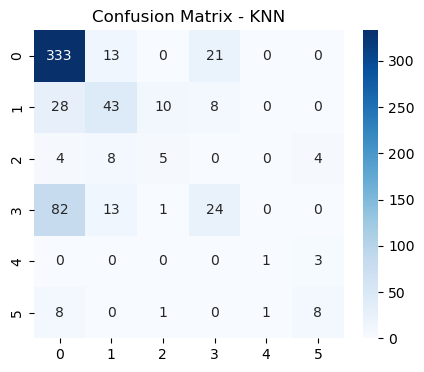


 Evaluating: Gaussian NB
--------------------------------------------------
Model: Gaussian NB
Accuracy:  0.6026
Precision: 0.2214
Recall:    0.3681
F1 Score:  0.2303


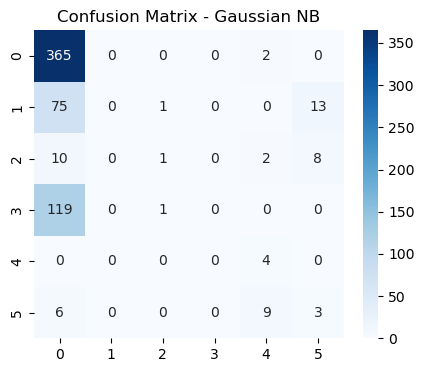


 Evaluating: Decision Tree
--------------------------------------------------
Model: Decision Tree
Accuracy:  0.7205
Precision: 0.4888
Recall:    0.5088
F1 Score:  0.4900


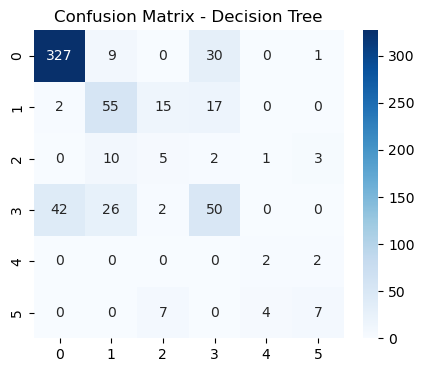


 Evaluating: SVC
--------------------------------------------------
Model: SVC
Accuracy:  0.6187
Precision: 0.2160
Recall:    0.1980
F1 Score:  0.1767


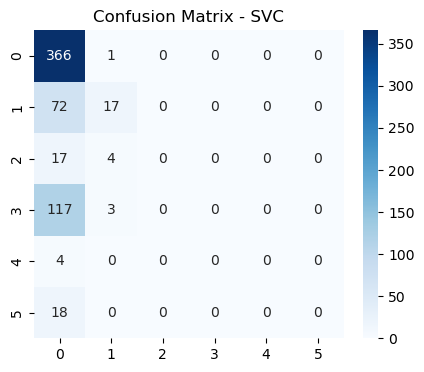


 Evaluating: Logistic Regression
--------------------------------------------------
Model: Logistic Regression
Accuracy:  0.5816
Precision: 0.0984
Recall:    0.1635
F1 Score:  0.1228


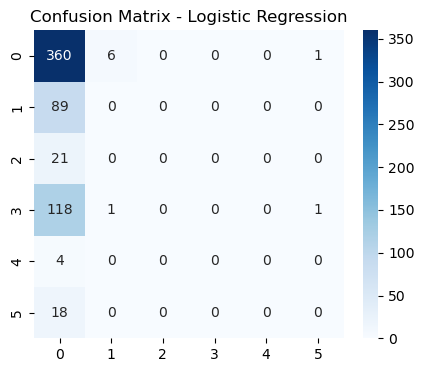


 Evaluating: Neural Network


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------------------------------------
Model: Neural Network
Accuracy:  0.7415
Precision: 0.5436
Recall:    0.5001
F1 Score:  0.5074


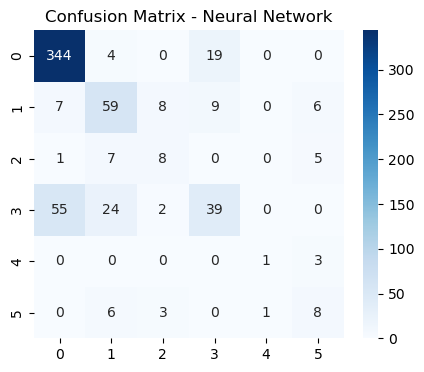


 Evaluating: Random Forest
--------------------------------------------------
Model: Random Forest
Accuracy:  0.7771
Precision: 0.5868
Recall:    0.6456
F1 Score:  0.5872


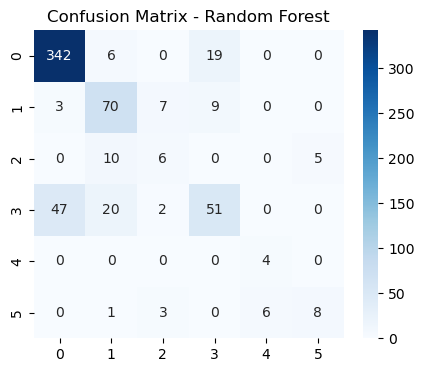

In [197]:
results = {}

for name, model in models.items():
    print(f"\n Evaluating: {name}")
    results[name] = evaluate_model(model, name)

## 10. Run All Models  

In [198]:
results_df = pd.DataFrame(
    results,
    index=["Accuracy","Precision","Recall","F1"]
).T

results_df

,Accuracy,Precision,Recall,F1
KNN,0.668821,0.511765,0.420507,0.447848
Gaussian NB,0.602585,0.221402,0.368139,0.230348
Decision Tree,0.720517,0.488840,0.508773,0.490010
SVC,0.618740,0.216027,0.198048,0.176659
Logistic Regression,0.581583,0.098361,0.163488,0.122825
Neural Network,0.741519,0.543648,0.500108,0.507438
Random Forest,0.777060,0.586824,0.645593,0.587214


## 11. Compare Model Performance  


BEST MODEL: Random Forest
Best F1 Score: 0.5872140350809997


<Figure size 1200x600 with 0 Axes>

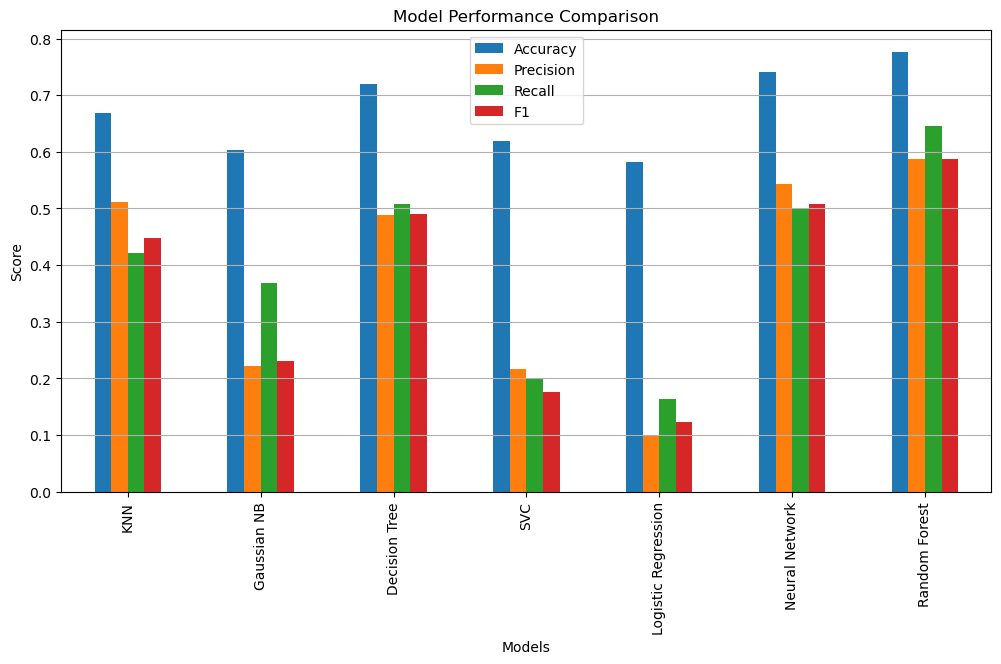

In [199]:
best_model_name = results_df["F1"].idxmax()
best_model_score = results_df["F1"].max()

print("\nBEST MODEL:", best_model_name)
print("Best F1 Score:", best_model_score)

plt.figure(figsize=(12,6))
results_df[["Accuracy", "Precision", "Recall", "F1"]].plot(kind="bar", figsize=(12,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.grid(axis='y')
plt.show()

# 12. Objectives

## Objective 1: Predict Future Pollutant Concentrations  
(Regression Using Neural Network)


Objective 1: Predict Future Pollutant Levels
Accuracy: 0.8384491114701131


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


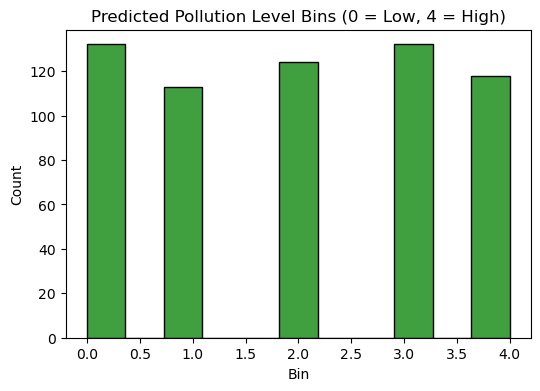

In [200]:
import pandas as pd
df["pollutant_bin"] = pd.qcut(df["pollutant_avg"], q=5, labels=False, duplicates="drop")

X = df.drop(["pollutant_avg", "pollutant_bin"], axis=1)
y = df["pollutant_bin"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.select_dtypes(include=[np.number])
X_test  = X_test.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

mlp_reg = MLPClassifier(max_iter=800)
mlp_reg.fit(X_train, y_train)

y_pred = mlp_reg.predict(X_test)

print("\nObjective 1: Predict Future Pollutant Levels")
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.histplot(y_pred, color="green")
plt.title("Predicted Pollution Level Bins (0 = Low, 4 = High)")
plt.xlabel("Bin")
plt.show()

## Objective 2: Identify High-Risk Air Quality Periods
(Classify time windows as Safe / Moderate / Hazardous)

Using target column: AQI_Class
Accuracy: 0.7948303715670436

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       377
           1       0.67      0.71      0.69        96
           2       0.54      0.28      0.37        25
           3       0.59      0.41      0.49        99
           4       1.00      0.80      0.89         5
           5       0.61      0.65      0.63        17

    accuracy                           0.79       619
   macro avg       0.71      0.63      0.66       619
weighted avg       0.78      0.79      0.78       619



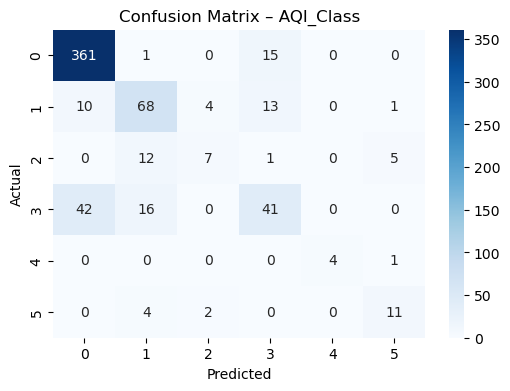

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

possible_targets = ["Risk", "AQI_Class", "pollutant_bin"]

target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    raise ValueError("No target column found! Add Risk, AQI_Class, or pollutant_bin.")

print("Using target column:", target_col)

features_to_drop = [
    "Risk", "AQI_Class", "pollutant_bin",
    "pollutant_avg", "pollutant_min", "pollutant_max",
    "last_update"
]

X = df.drop(columns=features_to_drop, errors="ignore")
y = df[target_col]

le = LabelEncoder()
for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except:
    print("Stratify failed, using normal split")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix – " + target_col)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Objective 3: Detect Geographical Pollution Patterns (KMeans)
(Cluster cities/stations by pollution characteristics)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


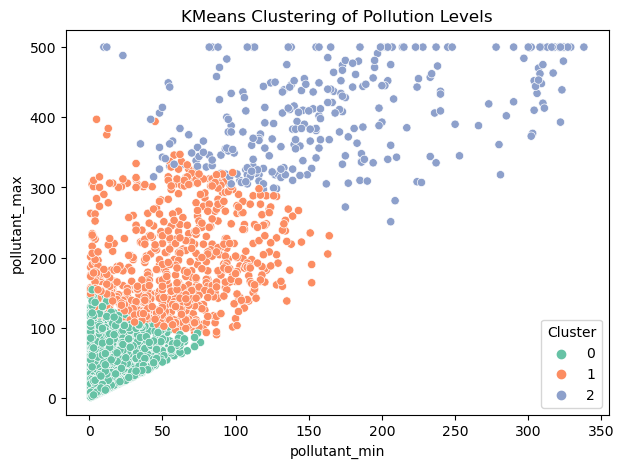

In [202]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = ["pollutant_min", "pollutant_max", "pollutant_avg"]
X_clust = df[features]

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_clust)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="pollutant_min",
    y="pollutant_max",
    hue="Cluster",
    palette="Set2"
)
plt.title("KMeans Clustering of Pollution Levels")
plt.show()


## Objective 4: Pollutant Anomaly Detection Using Z-Score
(Detect readings that are unusually high or low)

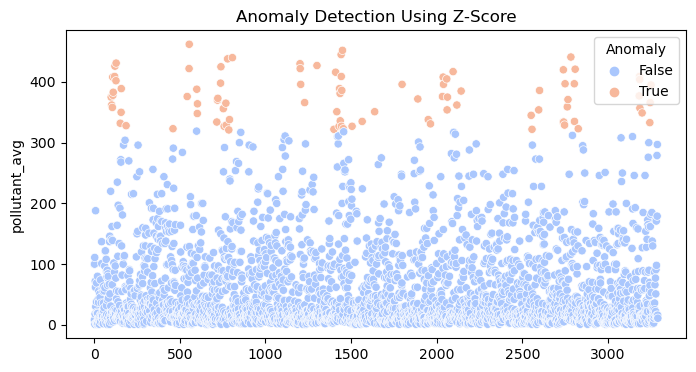

In [203]:
df["z_score"] = (df["pollutant_avg"] - df["pollutant_avg"].mean()) / df["pollutant_avg"].std()
df["Anomaly"] = df["z_score"].abs() > 3

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x=df.index, y="pollutant_avg", hue="Anomaly", palette="coolwarm")
plt.title("Anomaly Detection Using Z-Score")
plt.show()

## Objective 5 — Estimate Missing/Unreliable Values 
(Since regression models are not allowed, using a DecisionTreeClassifier to impute missing bins)

Missing values created: 50
Model trained for missing value imputation!

Predicted Missing pollutant_avg Values:
[381.  32.  82.  36.  23.  91.  66.  27. 201.  32. 124.   4.  93. 122.
  26.  83.   2.  26.  16. 171.   4. 108.  48.  23. 103.  44.  55. 193.
  29.  53.  88.  18.  21.  48.  17. 101.  18.   7. 100.   1. 101.  33.
  11.  31. 144.  36.  13.   3.  16.  77.]


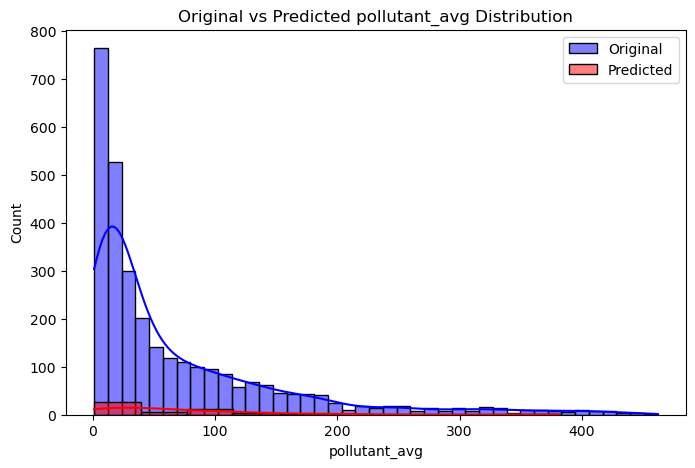

In [204]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df.copy()

np.random.seed(42)
missing_indices = np.random.choice(df2.index, size=50, replace=False)

df2.loc[missing_indices, "pollutant_avg"] = np.nan

print("Missing values created:", df2["pollutant_avg"].isna().sum())

train_df = df2.dropna(subset=["pollutant_avg"])
missing_df = df2[df2["pollutant_avg"].isna()]

drop_cols = ["pollutant_avg", "last_update", "AQI_Class", "pollutant_bin", "Risk"]
X = train_df.drop(columns=drop_cols, errors="ignore")
y = train_df["pollutant_avg"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print("Model trained for missing value imputation!")

X_missing = missing_df.drop(columns=drop_cols, errors="ignore")
X_missing = pd.get_dummies(X_missing)
X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)

missing_predictions = model.predict(X_missing)

print("\nPredicted Missing pollutant_avg Values:")
print(missing_predictions)
plt.figure(figsize=(8,5))
sns.histplot(train_df["pollutant_avg"], kde=True, label="Original", color="blue")
sns.histplot(missing_predictions, kde=True, label="Predicted", color="red")
plt.legend()
plt.title("Original vs Predicted pollutant_avg Distribution")
plt.show()


## Objective 6: Determine Key Drivers of Pollution
(Shows which factors affect pollution most)

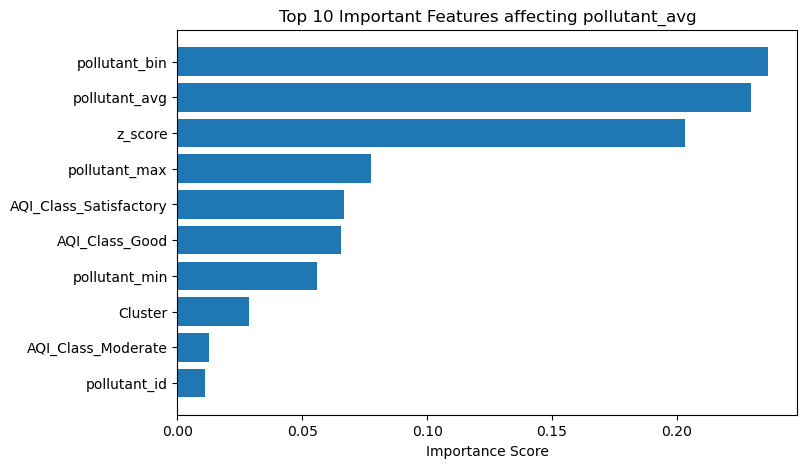

In [205]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

X = df.drop(columns=["last_update"], errors="ignore")

X = pd.get_dummies(X)

y_binned = pd.qcut(df["pollutant_avg"], q=5, labels=False, duplicates="drop")

rf_imp = RandomForestClassifier()
rf_imp.fit(X, y_binned)

importances = rf_imp.feature_importances_
indices = np.argsort(importances)[-10:]

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(X.columns[indices], importances[indices])
plt.title("Top 10 Important Features affecting pollutant_avg")
plt.xlabel("Importance Score")
plt.show()

In [206]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


In [207]:
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from reportlab.lib.pagesizes import A4
from reportlab.lib.units import cm
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet

out_dir = "report_assets"
os.makedirs(out_dir, exist_ok=True)
pdf_path = "AQIReport.pdf"

def save_plot(fig, fname):
    path = os.path.join(out_dir, fname)
    fig.tight_layout()
    fig.savefig(path, dpi=150)
    plt.close(fig)
    return path

imgs = {}

try:
    fig = plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="AQI_Class")
    plt.title("AQI Class Distribution")
    plt.xlabel("AQI Category")
    plt.ylabel("Count")
    imgs["aqi_class"] = save_plot(fig, "aqi_class.png")
except Exception as e:
    print("Skipping AQI class plot:", e)

try:
    top_cities = (
        df.groupby("city")["pollutant_avg"]
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )
    fig = plt.figure(figsize=(7,4))
    sns.barplot(x=top_cities.values, y=top_cities.index)
    plt.title("Top 10 Most Polluted Cities (Avg pollutant_avg)")
    plt.xlabel("Average Pollutant Level")
    plt.ylabel("City")
    imgs["top_cities"] = save_plot(fig, "top_cities.png")
except Exception as e:
    print("Skipping top city plot:", e)

try:
    agg = df[["pollutant_min", "pollutant_max", "pollutant_avg"]].mean()
    fig = plt.figure(figsize=(6,4))
    sns.barplot(x=agg.index, y=agg.values)
    plt.title("Mean of Min/Max/Avg Pollutant Levels")
    imgs["minmaxavg"] = save_plot(fig, "minmaxavg.png")
except Exception as e:
    print("Skipping min-max-avg plot:", e)

try:
    df["date"] = df["last_update"].dt.date
    daily = df.groupby("date")["pollutant_avg"].mean()
    fig = plt.figure(figsize=(8,4))
    plt.plot(daily.index, daily.values)
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Avg Pollutant Level")
    plt.title("Daily Pollutant Trend")
    imgs["daily"] = save_plot(fig, "daily_trend.png")
except Exception as e:
    print("Skipping daily trend plot:", e)

styles = getSampleStyleSheet()
title_style = styles["Title"]
normal = styles["BodyText"]
h2 = styles["Heading2"]

doc = SimpleDocTemplate(
    pdf_path,
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

flow = []

flow.append(Paragraph("Air Quality Analysis Report", title_style))
flow.append(Spacer(1, 0.4*cm))
flow.append(Paragraph(f"Generated on: {datetime.now()}", normal))
flow.append(Spacer(1, 0.6*cm))

flow.append(Paragraph("Dataset Summary", h2))
flow.append(Paragraph(
    "This dataset contains pollutant measurements recorded at various monitoring "
    "stations, along with geographic metadata and AQI category labels.",
    normal
))
flow.append(Spacer(1, 0.5*cm))
flow.append(PageBreak())

flow.append(Paragraph("Visual Analysis", h2))

captions = {
    "aqi_class": "Distribution of AQI Categories",
    "top_cities": "Top 10 Most Polluted Cities",
    "minmaxavg": "Average Values of Min/Max/Avg Pollutants",
    "daily": "Daily Trend of Pollutant Levels"
}

for key, img in imgs.items():
    if img:
        flow.append(Image(img, width=16*cm, height=7*cm))
        flow.append(Paragraph(captions[key], normal))
        flow.append(Spacer(1,0.5*cm))

flow.append(PageBreak())

flow.append(Paragraph("Conclusion", h2))
flow.append(Paragraph("""
• AQI class distribution helps identify dominant pollution categories.<br/>
• Top city comparison highlights pollution hotspots.<br/>
• Min/Max/Avg pollutant levels show spread and variability.<br/>
• Daily trend reveals fluctuations in pollutant intensity.<br/>
""", normal))

flow.append(Spacer(1, 0.5*cm))
flow.append(Paragraph("End of Report", normal))

doc.build(flow)
print("PDF successfully generated:", pdf_path)


PDF successfully generated: AQIReport.pdf


## Unforseen Data

In [208]:
unforeseen_data = df.tail(20)
train_data = df.iloc[:-20]

X_train = train_data[["pollutant_min", "pollutant_max", "pollutant_avg"]]
y_train = train_data["AQI_Class"]

model = RandomForestClassifier()
model.fit(X_train, y_train)

X_future = unforeseen_data[["pollutant_min", "pollutant_max", "pollutant_avg"]]
future_predictions = model.predict(X_future)

unforeseen_data["Predicted_AQI_Class"] = future_predictions
print(unforeseen_data[["AQI_Class", "Predicted_AQI_Class"]])

         AQI_Class Predicted_AQI_Class
3272  Satisfactory        Satisfactory
3273          Good                Good
3274          Good                Good
3275  Satisfactory        Satisfactory
3276          Good                Good
3277      Moderate            Moderate
3278  Satisfactory        Satisfactory
3279          Good                Good
3280  Satisfactory        Satisfactory
3281  Satisfactory        Satisfactory
3283      Moderate            Moderate
3284  Satisfactory        Satisfactory
3285          Good                Good
3286          Good                Good
3287          Poor                Poor
3288      Moderate            Moderate
3289          Poor                Poor
3290          Good                Good
3291          Good                Good
3292          Good                Good


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18572\412358821.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unforeseen_data["Predicted_AQI_Class"] = future_predictions


## Social Impact:
This project helps society by predicting pollution levels in advance, allowing citizens and government officials to plan actions that reduce exposure and control emissions. The clustering identifies high-risk zones where immediate measures are needed. By providing early warnings and eco-friendly suggestions, this system can support cleaner cities, healthier communities, and better public planning.

In [209]:
def pollution_alert(level):
    if level == "High":
        return " WARNING: Unhealthy Air Quality"
    elif level == "Medium":
        return " Moderate Air Quality"
    else:
        return " Air Quality is Safe"

In [210]:
def eco_suggestion(level):
    if level == "High":
        return [
            "Avoid outdoor activities", 
            "Use N95 masks", 
            "Reduce vehicle usage",
            "Industries should reduce emissions"
        ]
    elif level == "Medium":
        return [
            "Limit outdoor time",
            "Use public transport",
            "Monitor AQI daily"
        ]
    else:
        return [
            "Air is clean — encourage outdoor activities!",
            "Plant more trees to maintain good air"
        ]
##Example
level = model.predict([[10, 50, 30]])[0]
print("Suggestions:", eco_suggestion(level))

Suggestions: ['Air is clean — encourage outdoor activities!', 'Plant more trees to maintain good air']


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
